<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/Machine%20Learning/Moodle%20code%EF%BC%8F1_5_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
We have seen some early examples of EDA in the previous notebooks. This session will expand on this with more examples - again using the Boston house price data from the last example. As such, we start by importing the data:

包括数据导入，数据清晰准备，单变量分析，多变量分析，数据可视化，洞察和结论

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Only works on Jupyter/Anaconda ### 它的作用是让你生成的图表直接嵌入到Notebook中，而不是在新窗口中打开
%matplotlib inline

# import a standard dataset - the Boston house price index 导入Boston房价

data_url = "http://lib.stat.cmu.edu/datasets/boston" ### 包含Boston房价下载链接

### 使用pandas的read_csv函数从指定URL读取数据
### 参数sep="\s+"指定分隔符为一个或多个空格（正则表达式\s+表示匹配任何非空白字符的序列）
### skiprows=22跳过文件开头的22行，因为这些行包含非数据文本（如标题和描述
### header=None表示原始数据没有列标题，所以不将任何行用作列名
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

### hstack函数将数据重新组织为正确的格式
### raw_df.values[::2, :]获取所有偶数行（从0开始计数），即数据点的前一部分；
### raw_df.values[1::2, :2]获取所有奇数行的前两列，即数据点的后一部分
### np.hstack将这两部分水平堆叠（即并排放置），形成完整的数据点。


data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
### 二维切割 [1::2]代表从第二行开始,中间没有表示切割到最后一行，步长为2，代表跳过第三行到第四行；最后一个2表示每次切割都从第三列开始切割
target = raw_df.values[1::2, 2]

# 定义特征名称
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

# 将数据转换为DataFrame
boston = pd.DataFrame(data, columns=feature_names)
boston['MV'] = target  # 添加目标值列
boston.head()
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


.shape属性用来获取数据结构的维度——find the number of rows and columns with ".shape":

In [ ]:
boston.shape  ### 在Boston中，返回的是一个元组，包括两个元素，一个是行数，一个是列数

(506, 13)

We will also add the $Y$ value from the previous analysis to the DataFrame so we can include it in our EDA:

In [2]:
# add the target value (Median Value)
boston['MV'] = target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We can get informtaion about the data using the _info_ function:

In [ ]:
boston.info()  ### 用于查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MV       506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


We can find the number of unique and duplicated rows:

In [ ]:
boston.duplicated().value_counts() ### 通过返回布尔值（True表示重复的值，False表示不重复的值）

False    506
dtype: int64

We can see from this all our data items are of the type float64 (64-bit real numbers - with decimals). We can also see that each has "506 non-null" records and there are "506 entries". Seemingly there is no missing data but we can of course verify that with code we used in our previous pandas' Notebooks:

In [ ]:
boston.isnull().sum() ### 检测缺失值

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MV         0
dtype: int64

No missing data! If we had found some there are various options including deleting the rows (see the previous Notebook) effected or even deleting the columns. If we want to check if its sensible to delete a column we may want to see the percentage of the column's data that is missing:

In [ ]:
# Percent of data which is not available
# Percent of data which is not available
# /len(boston): 将每列的缺失值数量除以DataFrame的总行数（len(boston)返回boston的行数），
# 得到的是每列缺失值占总行数的比例。* 100: 最后，将上一步得到的比例乘以100，将其转换为百分比形式
boston.isnull().sum()/len(boston) * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MV         0.0
dtype: float64

Pandas will also give us summary statistics about this data:

In [ ]:
boston.describe() ### 描述性统计

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We can see there is some variation in the data format with some on a scale between 0 and 1 while "TAX" has a maximum value of 711. We will want to even this out and will cover that in the next Notebook.

### Visualising the Data

[]

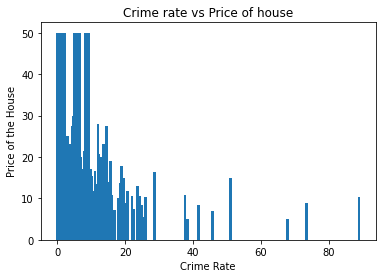

In [ ]:
plt.bar(boston.CRIM, boston.MV) ### 取data frame中的两列
plt.xlabel('Crime Rate')
plt.ylabel('Price of the House')
plt.title('Crime rate vs Price of house')
plt.plot()

As we might predict, as crime rate decreases house prices increase. Let's look at another:

[]

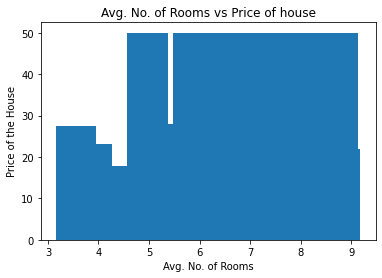

In [ ]:
plt.bar(boston.RM, boston.MV)
plt.xlabel('Avg. No. of Rooms')
plt.ylabel('Price of the House')
plt.title('Avg. No. of Rooms vs Price of house')
plt.plot()

Again, unsurprisingly, more rooms suggests higher prices although after a certain point the relationship flattens. We would probably want to look at this for all our data, but for now we can move on.

Given we are doing a linear regression, it would make sense to check the data for normality. Let's start with a histogram:

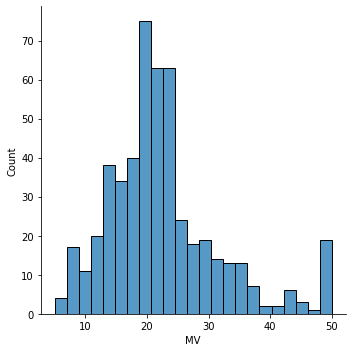

In [ ]:
ax = sns.displot(boston.MV)  ### 调用了displot函数，用于查看单变量分布的形状&分散

Whilst this is not exactly normal - slightly skewed and with a lot of values in the very last bin - its probably fine in practice. However, let's back this up with some actual testing:

In [3]:
# Use the Kolmogorov-Smirnov test ： KS检验，是一种非参数检验方法（使用于非正态且不易转换的数据）
# 用于比较一个样本的分布是否与一个参考分布（如正态分布）相同，或者比较两个样本分布是否相同。
from scipy.stats import kstest

### 循环遍历Boston中的每一列：对每一列进行KS检验
for col in boston.columns: # iteratre over each column
     # compare the column distribution to a normal distribution，将每一列和标准正态分布比较
    statistic, pval = kstest(boston[col], "norm") ### norm指定了正态分布，Kstest返回2个值，统计量和P值
    print(f"column = {col}") ### 打印当前正在测试的列名
    print(f"p value = {pval}")
    if pval < 0.05:
        print("Probably not normal")
    else:
        print("Probaly normal")
    print("\n") ### 在每个列的测试结果之后打印一个空行，以便于阅读

column = CRIM
p value = 9.101764614072096e-119
Probably not normal


column = ZN
p value = 1.6871111181943794e-117
Probably not normal


column = INDUS
p value = 0.0
Probably not normal


column = CHAS
p value = 1.6871111181943794e-117
Probably not normal


column = NOX
p value = 2.7133228490861893e-209
Probably not normal


column = RM
p value = 0.0
Probably not normal


column = AGE
p value = 0.0
Probably not normal


column = DIS
p value = 0.0
Probably not normal


column = RAD
p value = 0.0
Probably not normal


column = TAX
p value = 0.0
Probably not normal


column = PTRATIO
p value = 0.0
Probably not normal


column = B
p value = 0.0
Probably not normal


column = LSTAT
p value = 0.0
Probably not normal


column = MV
p value = 0.0
Probably not normal




In each case we are rejecting the null hypothesis ($H_0$ = each of the columns has the same distribution as a normal distribution) ... so maybe Linear Regression is not the best approach!

As well as making an assumption that our data is normally distributed, Linear Regression also assumes that our features ($X$'s) are not corrleated with each other (multicolinearity - read more [here](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/multicollinearity.html)). We can test for this with a correlation matrix:

We can use the pairplot() method to visualise pairs of variables:

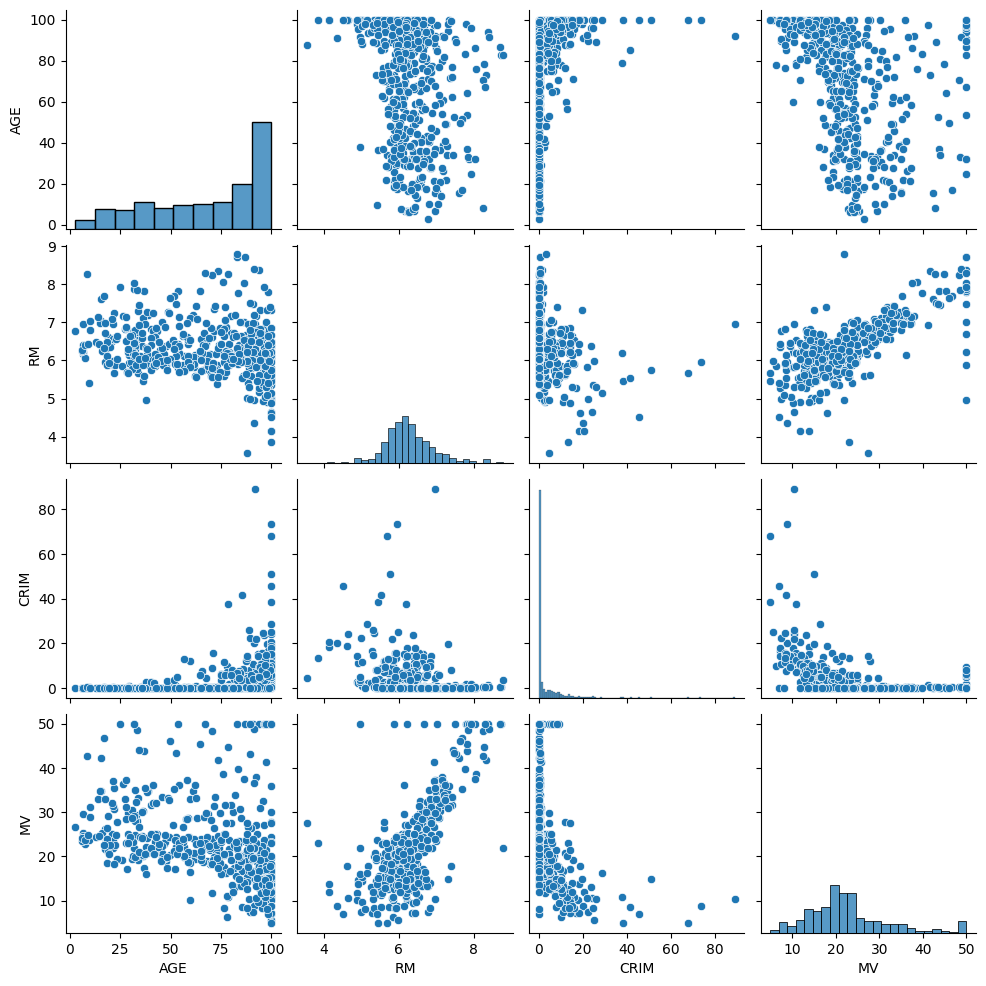

In [7]:
#sns.pairplot(data = boston) pairplot用于检测多重共线
### 使用pairplot创建一个关系图，默认在对角线上绘制散点图；
### diag_kind='hist'：这个参数指定了对角线上图的种类。设置为'hist'意味着对角线上将显示每个变量的直方图，而不是默认的密度图
### 如果要绘制密度图需要把hist设置成kde
sns.pairplot(data = boston[['AGE','RM','CRIM','MV']],diag_kind='hist')#diag_kind{‘auto’, ‘hist’, ‘kde’, None}

**VIF判断标准**：
VIF = 1：没有共线性。 1 < VIF < 5：共线性是中等的，通常不需要特别关注。 VIF ≥ 5 或 VIF ≥ 10（标准不一，依据具体领域和研究背景）：表示存在高度共线性，需要进一步检查。一些文献和研究人员使用5作为阈值，而另一些则使用10。高于阈值的VIF值意味着相关自变量的方差和标准误差可能被放大，从而影响回归系数的稳定性和可靠性。

In [5]:
### 方差膨胀因子 VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 为数据添加常数项，用于截距
X = add_constant(boston)

# 计算VIF
VIF = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],
                index=X.columns)
print(VIF)

const      645.977937
CRIM         1.831537
ZN           2.352186
INDUS        3.992503
CHAS         1.095223
NOX          4.586920
RM           2.260374
AGE          3.100843
DIS          4.396007
RAD          7.808198
TAX          9.205542
PTRATIO      1.993016
B            1.381463
LSTAT        3.581585
MV           3.855684
dtype: float64


<Axes: >

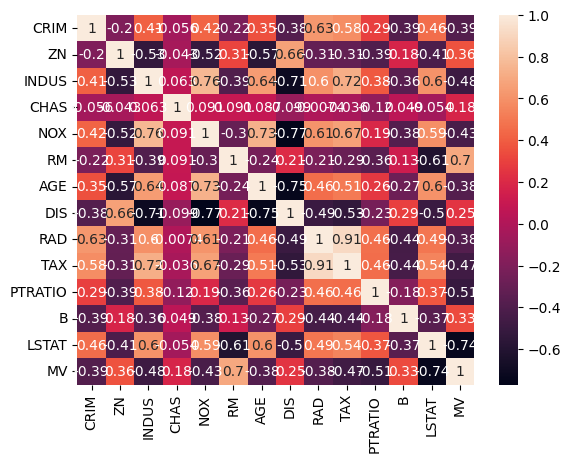

In [4]:
### 相关系数矩阵检测多重共线性：

import pandas as pd
import seaborn as sns

# 假设df是包含你数据的pandas DataFrame
correlation_matrix = boston.corr()
sns.heatmap(correlation_matrix, annot=True)  # 使用Seaborn绘制热力图

This chart can tell us a few interesting things.

One is the features that have the strongest influence on (i.e. are most predictive of) our target variable ("MV"). We measure this on a scale between -1 and 1 ... where -1 means perfective negative correlation (every unit that $X$ is reduced by then $Y$ would increase by a unit and vice versa); 1 means perfect positive correlation (every unit that $X$ increases by, $Y$ increases by a unit); 0 means no correlation at all.

We can see that "MV" has perfect correlation with itself (all variables do obviously and this is then diagonal down the middle). We can also see it has a strong negative correlation with "LSTAT" at -0.7 and strong positive correlations with "RM" at 0.7.

We also use it to see if any of our features ($X$'s) have high positive or negative correlation. There are a few we might be concerned about but the most so is "RAD" and "TAX" at 0.9. We should probably drop one but which? We could take a data driven approach and compare their correlation with "MV". In this case "RAD" is -0.4 and "TAX" -0.5 - so "TAX" has the stronger effect and "RAD" should be dropped. We may also consider what the data means (theory driven). To save you going back to the description in the previous Notebook, "RAD" is defined as "[the] index of accessibility to radial highways" and "TAX" as "full-value property-tax rate per \$10,000". So one relates to closeness to key roads and the other relates to property tax ... I would assume "TAX" to be more relevant in our task. Either way we arrive at the same conclusion and should drop "RAD". (We'll also drop the target value ($Y$) now so that we are ready to split our data:

在准备数据进行模型训练之前，我们通常会将数据集分为特征集和目标集，也就是将X和Y分开

In [8]:
boston = boston.drop(['RAD', 'MV'], axis=1) ### MV这里是Y，移除RAD是因为TAX和Y更相关
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


We can create histograms for all numerical features:
---

画这些变量各自的分布直方图

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'CHAS'}>,
        <Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>],
       [<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>,
        <Axes: title={'center': 'TAX'}>],
       [<Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>, <Axes: title={'center': 'LSTAT'}>]],
      dtype=object)

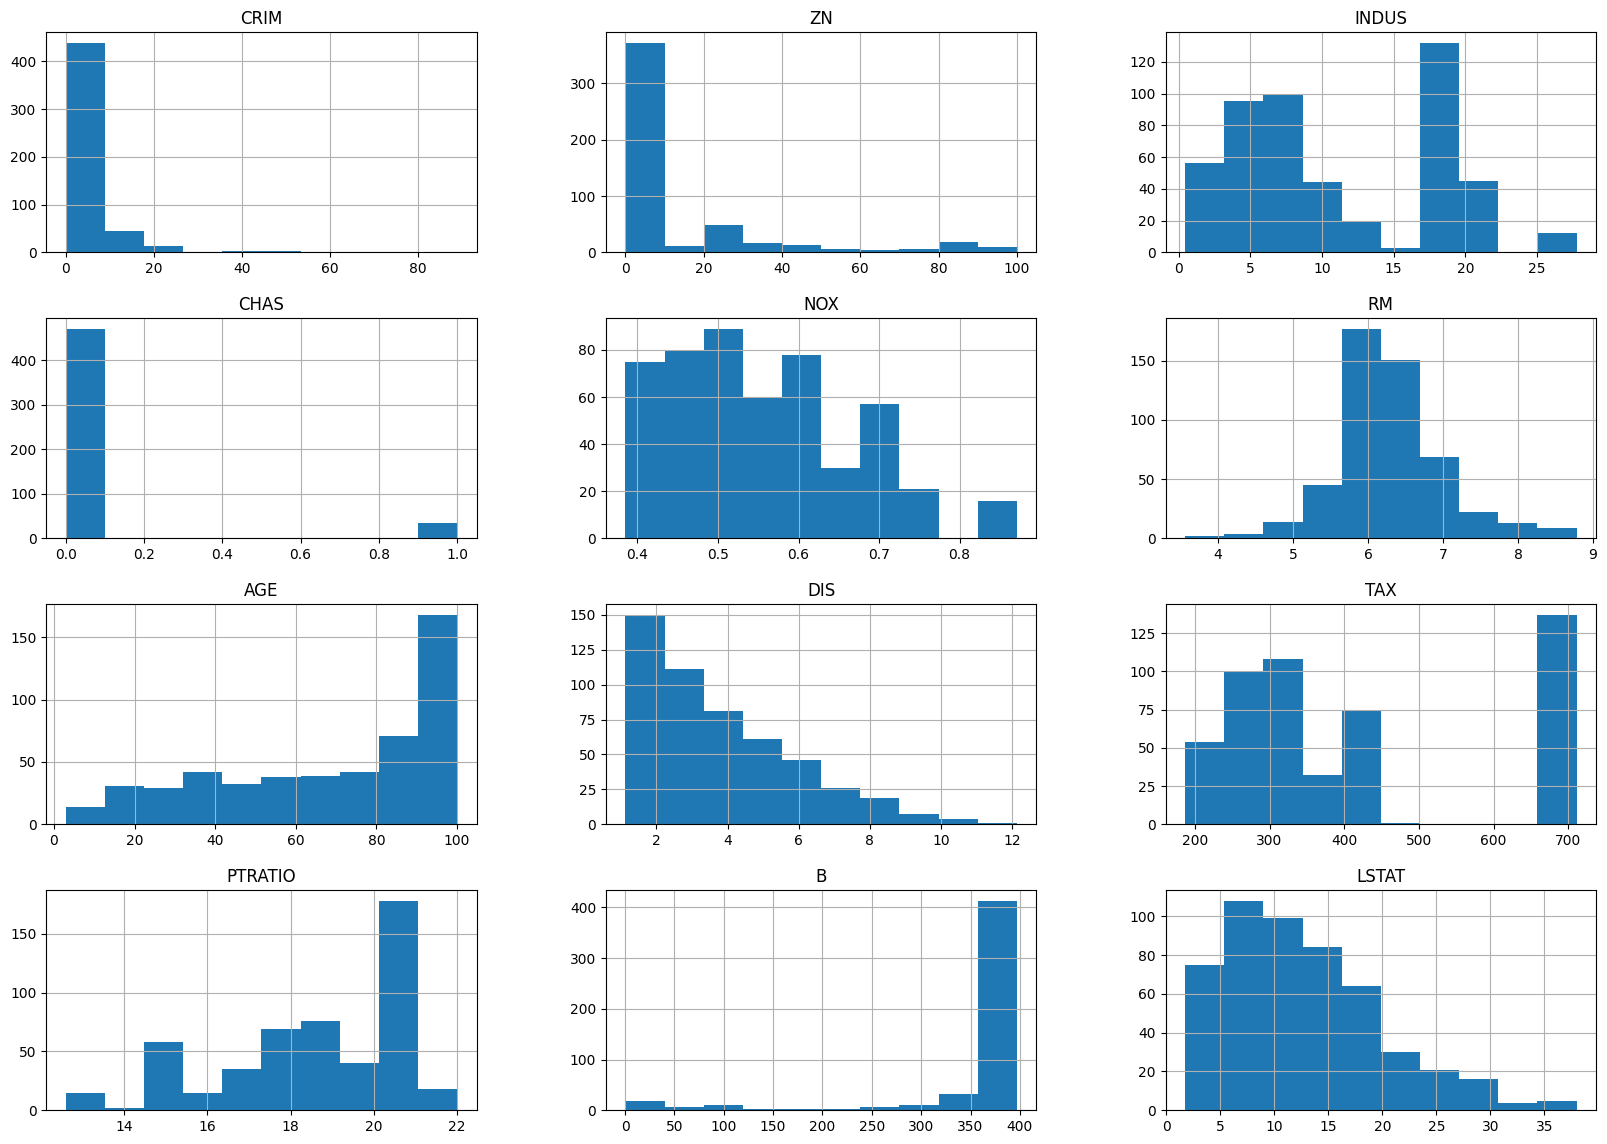

In [9]:
### DataFrame.select_dtypes()方法来筛选boston DataFrame中的数值型
numerical_atributes=boston.select_dtypes(include=['int64','float64']) #In this example we could only filter int64
numerical_atributes.hist(figsize=(20,14)) ### figsize=(20,14)设置了图表的大小，宽度为20英寸，高度为14英寸

We can

And that's it! There are of course many of things we could do but this is a fairly typical example of an EDA process. Well done :)